In [ ]:
Step - 1 : Collect the data sets 
I have collected real-time datasets as CSV format 
From the 2023 batch of various engineering branches including IT, CSE, EEE, ECE, Mechanical, Civil, and Metallurgy

In [3]:
import pandas as pd

# Load your CSV data into DataFrames
csv_files = {
    'IT': pd.read_csv(r'C:\Users\user\Downloads\IT.csv'),
    'CSE': pd.read_csv(r'C:\Users\user\Downloads\CSE.csv'),
    'EEE': pd.read_csv(r'C:\Users\user\Downloads\EEE.csv'),
    'ECE': pd.read_csv(r'C:\Users\user\Downloads\ECE.csv'),
    'Mechanical': pd.read_csv(r'C:\Users\user\Downloads\Mec.csv'),
    'Civil': pd.read_csv(r'C:\Users\user\Downloads\Civil.csv'),
    'Metallurgy': pd.read_csv(r'C:\Users\user\Downloads\Met.csv')
}

# Explore the data
for branch, df in csv_files.items():
    print(f"Data for {branch}")
    print(f"Size of {branch} data: {df.shape} (rows, columns)")
    print(df.head())
    print("\n")

Enter the desired length of the password:  8


Generated Password: 6;u"Dh<>
Data for IT
Size of IT data: (64, 10) (rows, columns)
   S.No  Hall Ticket No   Rank Roll Number        Name of the Candidate Sex  \
0     1     50184010128  17363  23VV1A1201      ALLADA SAI SATYA SHARAN   M   
1     2     50464010077  70825  23VV1A1202         BANDARU DURGA PRASAD   M   
2     3     50988010031  24053  23VV1A1203  BANDARU VENKATA RAMALAKSHMI   F   
3     4     50487010013  44405  23VV1A1204       BATLABHADRA GOPI CHAND   M   
4     5     50779010158  16409  23VV1A1205              BEHARA SAHITHYA   F   

  Caste Region  Seat Category     Remarks  
0  BC_B     AU    BC_B_GEN_UR  28-08-2023  
1    ST     AU  OC_PHO_GEN_AU  28-08-2023  
2    OC     AU   EWS_GIRLS_AU  25-09-2023  
3    ST     AU      ST_GEN_AU  25-09-2023  
4  BC_D     AU  BC_D_GIRLS_AU  28-08-2023  


Data for CSE
Size of CSE data: (63, 10) (rows, columns)
   S.No     H Number   Rank Roll Number     Name of the Candidate Sex Caste  \
0     1  50962060029  13947  23VV1A0501  

In [ ]:
Step - 2 : Distribution of Ranks for each branch in Histogram form

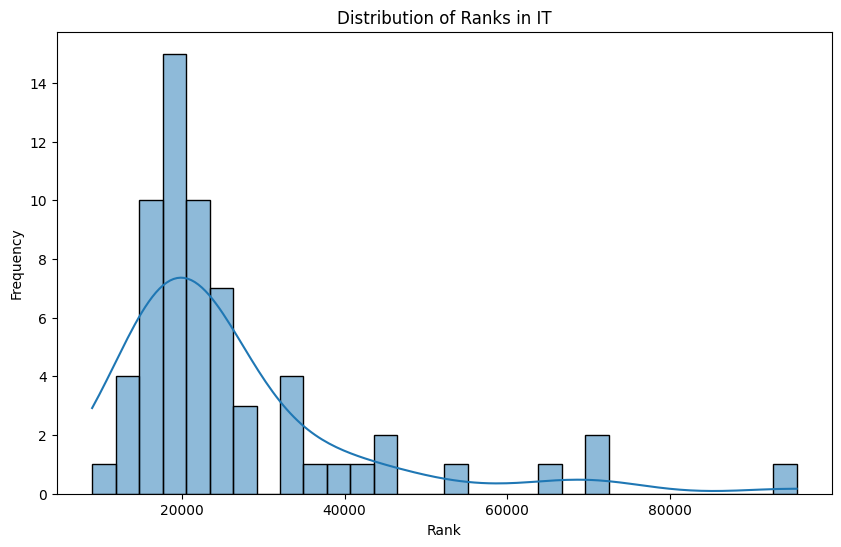

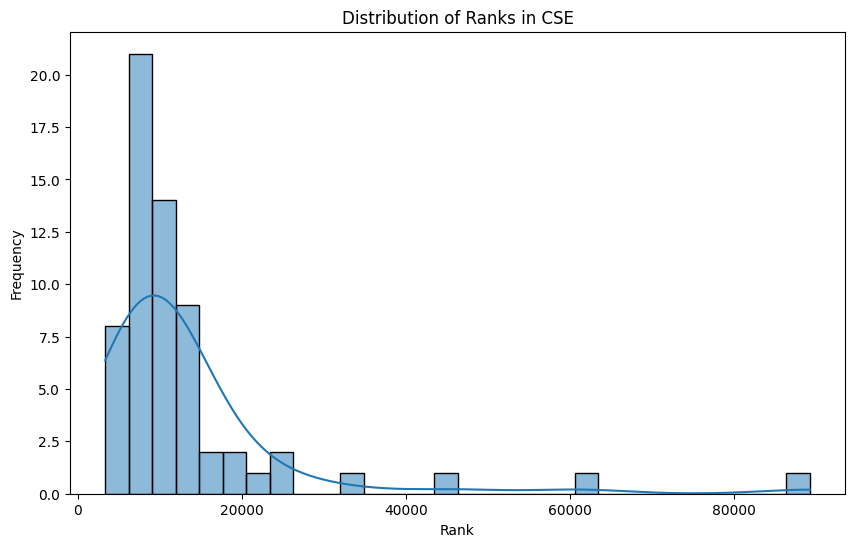

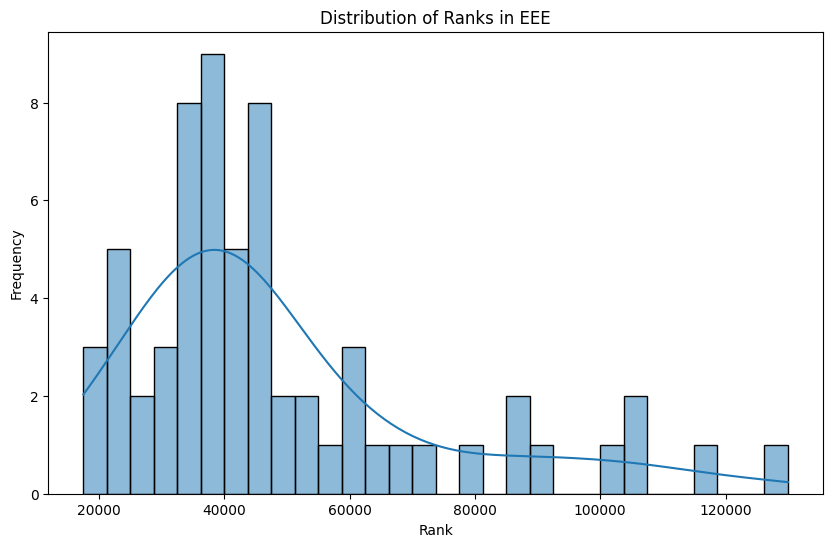

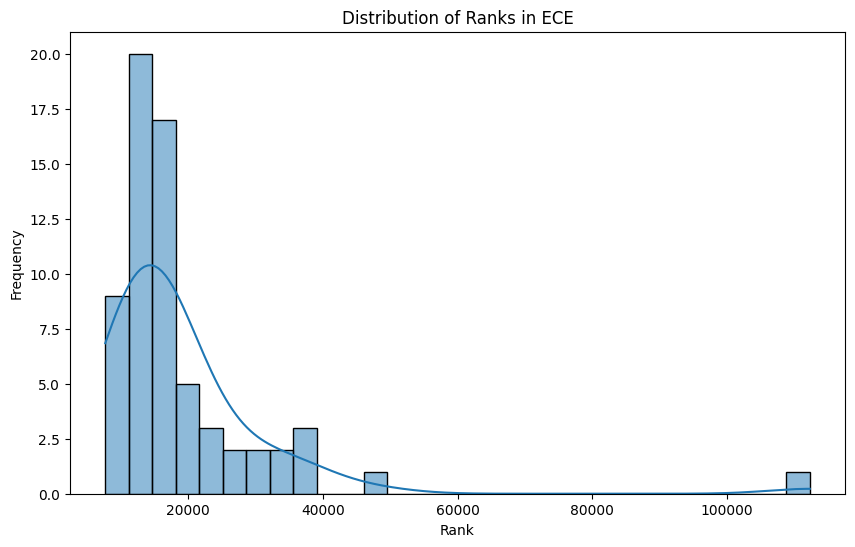

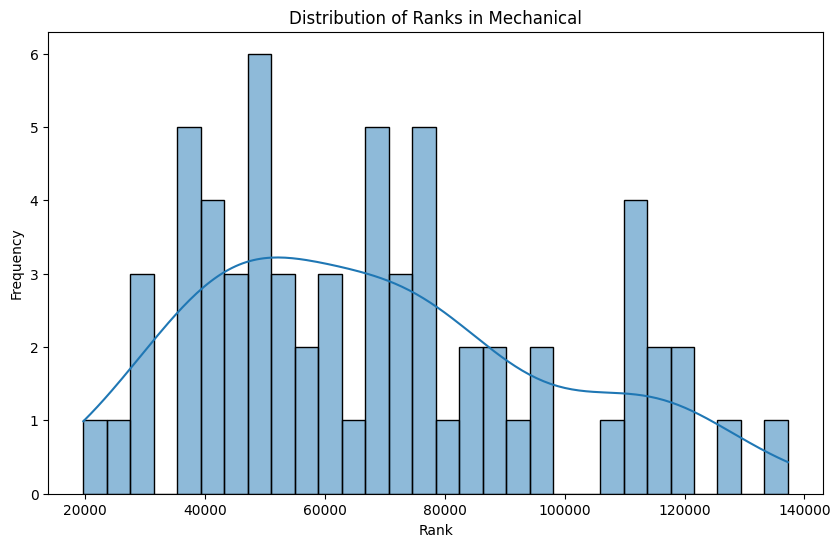

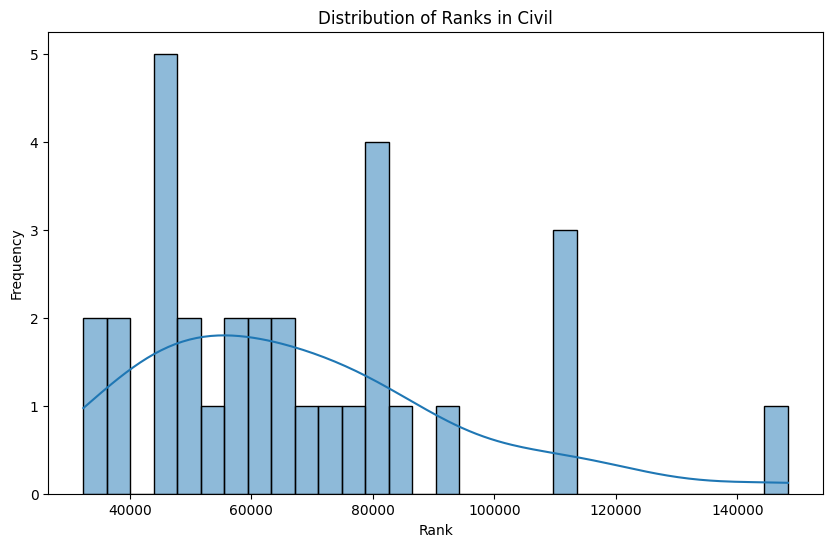

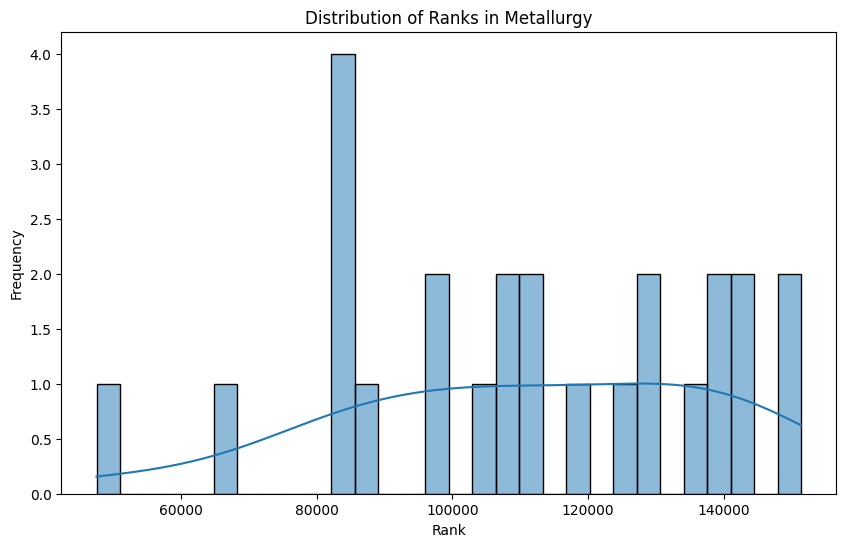

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization: Distribution of ranks for each branch
for branch, df in csv_files.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Rank'], bins=30, kde=True)
    plt.title(f'Distribution of Ranks in {branch}')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
Step - 3 : Created a new feature as Rank category

In [5]:
# Create a new feature if needed (e.g., Rank category based on score)
def feature_engineering(df):
    df['Rank_Category'] = pd.cut(df['Rank'], bins=[0, 10000, 50000, 100000], labels=['High', 'Medium', 'Low'])
    return df

# Apply feature engineering to all datasets
csv_files = {branch: feature_engineering(df) for branch, df in csv_files.items()}


In [6]:
from sklearn.model_selection import train_test_split

def split_data(df):
    X = df[['Rank']]  # Features
    y = df['Rank_Category']  # Change to the correct target column
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Example for IT branch
X_train, X_test, y_train, y_test = split_data(csv_files['IT'])

In [ ]:
Step - 4 : Train the model 
I used the Random Forest Classifier model 
Due to its powerful ensemble learning capabilities.
This model combines multiple decision trees, which helps improve prediction accuracy and robustness by reducing the risk of overfitting associated with individual trees.


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train the model (Example: Random Forest)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


In [ ]:
Step - 5 : Evaluate the model 

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Detailed report
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0
              precision    recall  f1-score   support

      Medium       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [9]:
import joblib
import pandas as pd

# Load the model
clf = joblib.load(r'C:\Users\user\flask_project\model.pkl')  # Make sure the path is correct

# Load new data
new_data = pd.read_csv(r'C:\Users\user\Downloads\IT.csv')  # Adjust this path
X_new = new_data[['Rank']]  # Make sure you only include the relevant features

# Make predictions
predictions = clf.predict(X_new)
new_data['Predictions'] = predictions  # Store predictions in the DataFrame

# Check the predictions
print(new_data)


    S.No  Hall Ticket No   Rank Roll Number          Name of the Candidate  \
0      1     50184010128  17363  23VV1A1201        ALLADA SAI SATYA SHARAN   
1      2     50464010077  70825  23VV1A1202           BANDARU DURGA PRASAD   
2      3     50988010031  24053  23VV1A1203    BANDARU VENKATA RAMALAKSHMI   
3      4     50487010013  44405  23VV1A1204         BATLABHADRA GOPI CHAND   
4      5     50779010158  16409  23VV1A1205                BEHARA SAHITHYA   
..   ...             ...    ...         ...                            ...   
59    60     50589020061  20165  23VV1A1260            YELAMANCHILI NAVEEN   
60    61     50388010108  17808  23VV1A1261           YELLETI BHAVANIKUMAR   
61    62     50672010842  17951  23VV1A1262               YELURI VARUN TEJ   
62    63     50472080293   8931  23VV1A1263  YENDLURI GHANA SATHYA KARTHIK   
63    64     50683010816  16745  23VV1A1264                YERRA TEJASWINI   

   Sex Caste Region  Seat Category     Remarks Predictions  
0 

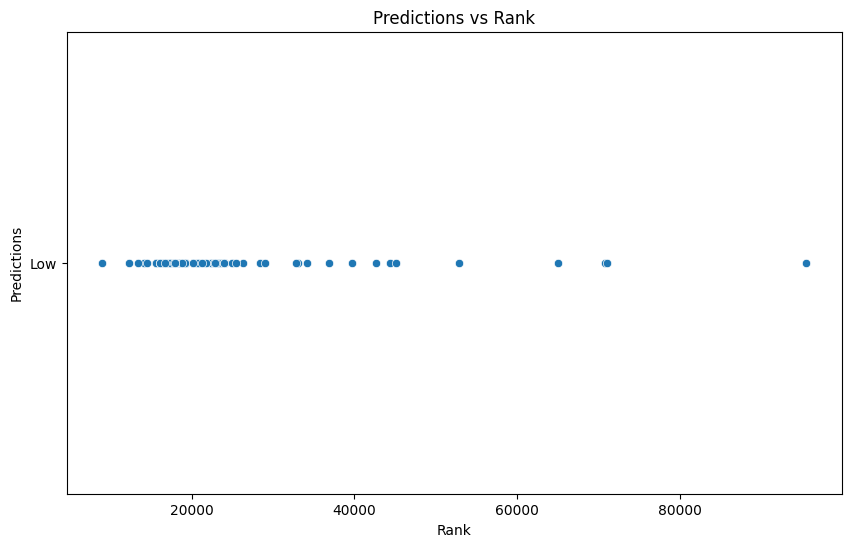

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_data['Rank'], y=new_data['Predictions'])
plt.title('Predictions vs Rank')
plt.xlabel('Rank')
plt.ylabel('Predictions')
plt.show()


    S.No  Hall Ticket No   Rank Roll Number          Name of the Candidate  \
0      1     50184010128  17363  23VV1A1201        ALLADA SAI SATYA SHARAN   
1      2     50464010077  70825  23VV1A1202           BANDARU DURGA PRASAD   
2      3     50988010031  24053  23VV1A1203    BANDARU VENKATA RAMALAKSHMI   
3      4     50487010013  44405  23VV1A1204         BATLABHADRA GOPI CHAND   
4      5     50779010158  16409  23VV1A1205                BEHARA SAHITHYA   
..   ...             ...    ...         ...                            ...   
59    60     50589020061  20165  23VV1A1260            YELAMANCHILI NAVEEN   
60    61     50388010108  17808  23VV1A1261           YELLETI BHAVANIKUMAR   
61    62     50672010842  17951  23VV1A1262               YELURI VARUN TEJ   
62    63     50472080293   8931  23VV1A1263  YENDLURI GHANA SATHYA KARTHIK   
63    64     50683010816  16745  23VV1A1264                YERRA TEJASWINI   

   Sex Caste Region  Seat Category     Remarks Predictions  
0 

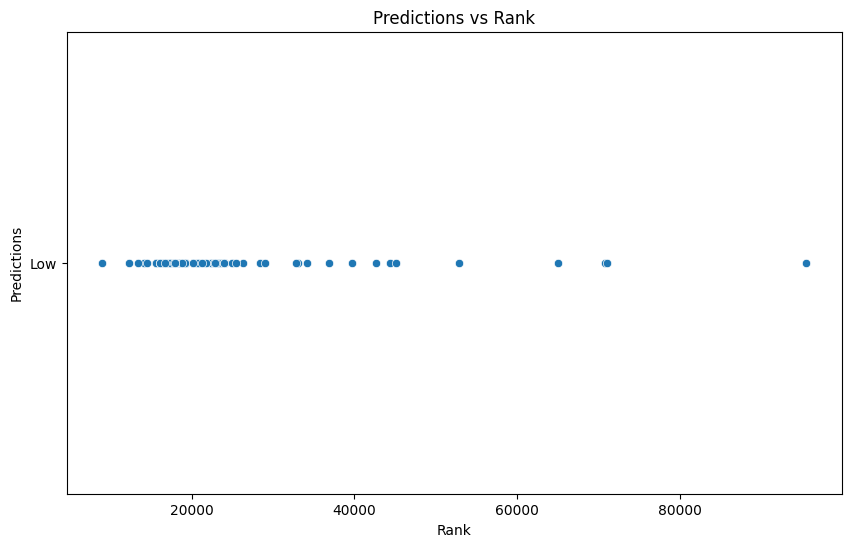

In [11]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model
clf = joblib.load(r'C:\Users\user\flask_project\model.pkl')  # Ensure the path is correct

# Load new data
new_data = pd.read_csv(r'C:\Users\user\Downloads\IT.csv')  # Adjust this path
X_new = new_data[['Rank']]  # Ensure you only include relevant features

# Make predictions
predictions = clf.predict(X_new)
new_data['Predictions'] = predictions  # Store predictions in the DataFrame

# Check the predictions
print(new_data)

# Save the DataFrame with predictions
new_data.to_csv(r'C:\Users\user\Downloads\IT_with_predictions.csv', index=False)

# Visualize the Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_data['Rank'], y=new_data['Predictions'])
plt.title('Predictions vs Rank')
plt.xlabel('Rank')
plt.ylabel('Predictions')
plt.show()
